In [38]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# MODELLING 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor 
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
import warnings

In [39]:
df = pd.read_csv("data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing x and y 

In [40]:
x = df.drop(columns="math score",axis=1)
y = df["math score"]

In [41]:
num_feature = x.select_dtypes(exclude = "object").columns
cat_feature = x.select_dtypes(include = "object").columns

In [42]:
num_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessing = ColumnTransformer(
    [
        ("OnehotEncoder",oh_transformer,cat_feature),
        ("StandardScaler",num_transformer,num_feature)
    ]
)

In [43]:
x = preprocessing.fit_transform(x)

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Evaluation function to give all metrics after training 

In [50]:
def evaluate_models(actual_vals,predicted_vals):
    mae = mean_absolute_error(actual_vals,predicted_vals)
    mse = mean_squared_error(actual_vals,predicted_vals)
    rmse = np.sqrt(mse)
    r2_square = r2_score(actual_vals,predicted_vals)
    return mae,rmse,r2_square

In [51]:
models = {
    "Linear Regression "       : LinearRegression(),
    "Lasso"                    : Lasso(),
    "Ridge"                    : Ridge(),
    "K-Neighbors regressor "   : KNeighborsRegressor(),
    "Decision tree "           : DecisionTreeRegressor(),
    "randomforest"             : RandomForestRegressor(),
    "XGBRegressor"             : XGBRegressor(),
    "CatBoosting regressor "   : CatBoostRegressor(verbose = False),
    "AdaBoost regressor "      : AdaBoostRegressor()
}

In [72]:
model_list = []
r2_list    = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # PREDICTIONS
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    
    # EVALUATING BASED ON TEST AND TRAIN
    train_mae , train_rmse, train_r2 = evaluate_models(y_train, train_pred)
    test_mae , test_rmse, test_r2    = evaluate_models(y_test, test_pred)

    # print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< {0} >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> \n".format(list(models.keys())[i]))

    print("Model performance based on train data")
    print(" - ROOT MEAN SQUARED ERROR      :    {:.4f}".format(train_rmse))
    print(" - MEAN ABSOLUTE ERROR          :    {:.4f}".format(train_mae))
    print(" - R2 SCORE                     :    {:.4F}".format(train_r2))

    print("-------------------------------------------------------")

    print("Model performance based on test data")
    print(" - ROOT MEAN SQUARED ERROR      :    {:.4f}".format(test_rmse))
    print(" - MEAN ABSOLUTE ERROR          :    {:.4f}".format(test_mae))
    print(" - R2 SCORE                     :    {:.4F}".format(test_r2))
    r2_list.append(test_r2)


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< Linear Regression  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

Model performance based on train data
 - ROOT MEAN SQUARED ERROR      :    5.3293
 - MEAN ABSOLUTE ERROR          :    4.2715
 - R2 SCORE                     :    0.8740
-------------------------------------------------------
Model performance based on test data
 - ROOT MEAN SQUARED ERROR      :    5.4252
 - MEAN ABSOLUTE ERROR          :    4.2222
 - R2 SCORE                     :    0.8790
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< Lasso >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

Model performance based on train data
 - ROOT MEAN SQUARED ERROR      :    6.5938
 - MEAN ABSOLUTE ERROR          :    5.2063
 - R2 SCORE                     :    0.8071
-------------------------------------------------------
Model performance based on test data
 - ROOT MEAN SQUARED ERROR      :    6.5197
 - MEAN ABSOLUTE ERROR          :    5.1579
 - R2 SCORE      

d:\codes\mlproject\venv\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< CatBoosting regressor  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

Model performance based on train data
 - ROOT MEAN SQUARED ERROR      :    3.0427
 - MEAN ABSOLUTE ERROR          :    2.4054
 - R2 SCORE                     :    0.9589
-------------------------------------------------------
Model performance based on test data
 - ROOT MEAN SQUARED ERROR      :    6.0086
 - MEAN ABSOLUTE ERROR          :    4.6125
 - R2 SCORE                     :    0.8516
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< AdaBoost regressor  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

Model performance based on train data
 - ROOT MEAN SQUARED ERROR      :    5.8054
 - MEAN ABSOLUTE ERROR          :    4.7497
 - R2 SCORE                     :    0.8505
-------------------------------------------------------
Model performance based on test data
 - ROOT MEAN SQUARED ERROR      :    6.0038
 - MEAN ABSOLUTE ERROR          :    4.6756

In [76]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["MODEL NAME","R2 SCORE"]).sort_values(by=["R2 SCORE"],ascending=False)

,MODEL NAME,R2 SCORE
2,Ridge,0.880593
0,Linear Regression,0.879046
8,AdaBoost regressor,0.851869
7,CatBoosting regressor,0.851632
5,randomforest,0.849100
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors regressor,0.783813
4,Decision tree,0.753964


LINEAR REGRESSION

In [84]:
linear_regressor = LinearRegression(fit_intercept=True) # (fit_intercept) - indicates wheather or not to the model should calculate the intercept (b) during the fitting process 
linear_regressor = linear_regressor.fit(x_train,y_train)
pred = linear_regressor.predict(x_test)
score = r2_score(y_test,pred)*100
print("The accuracy score : %.2f" %score)

The accuracy score : 87.90


<Axes: xlabel='math score', ylabel='Predicted'>

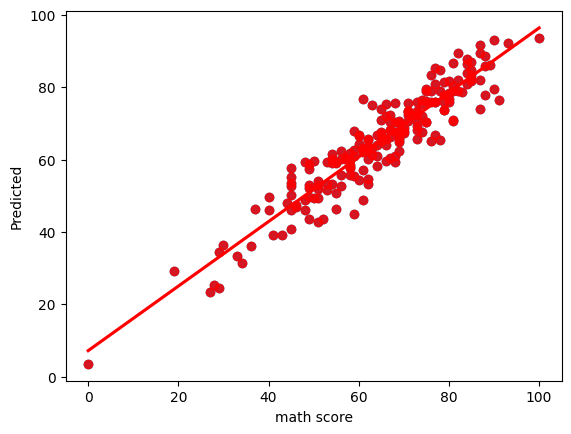

In [93]:
plt.scatter(y_test,pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x=y_test,y=pred,ci=None,color ='red')

In [96]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':pred,'Difference':y_test-pred})
pred_df.head()

,Actual Value,Predicted Value,Difference
521,91,76.4375,14.5625
737,53,59.3125,-6.3125
740,80,76.6250,3.3750
660,74,76.5625,-2.5625
411,84,87.7500,-3.7500
